# Canine S-index
Or, which of these doggos is most similar to a sausage?

Sausage dogs are among the cutest creatures in existence, no doubt. Just look at this majestic unit:

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/Short-haired-Dachshund.jpg/330px-Short-haired-Dachshund.jpg' alt='Dachshund' width='400'>

_Credit: Igor Bredikhin via Wikipedia_

Corgis and Basset Hounds are two other sausage dogs in contention for ultimate sausage-ness, but which of these sausage dogs are objectively closer to the sausage ideal? Where do other dog breeds fall on the sausage-ness spectrum? These are important questions that need answering. 

The most important metric to consider when measuring sausage-ness is, of course, the side profile of the dog: is it longer than it is tall? We can use the ratio of (back) length to height to compare dogs on this metric. I'm going to call this ratio the `S-index` in my code, but you can call it sausage-ness if you like.



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data source

It's surprisingly difficult to find morphometric data for dog breeds. The [American Kennel Club](https://akc.org) provides height and weight information but not back length, which is crucial in determining S-index. The authors of [this paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2748280/) collected a large variety of measurements, including back length, but they haven't supplied any raw data. If this were a proper scientific study, I'd have to contact the authors with a request for data, but I've already invested more time than I should in this study of sausage dogs, so here we go.

The design-focused website [dimensions.com](https://www.dimensions.com/collection/dogs-dog-breeds) does provide back lengths. Instead of the [withers height](https://en.wikipedia.org/wiki/Withers) which is used by the American Kennel Club, height in the rest of this notebook refers to standing height. This is simply because I don't currently have the time to collect the withers height. Using withers height would probably give us a better indicator of sausage-ness.

Note that this website doesn't cite the source of their data, so take this otherwise scientifically rigorous study of sausage dogs with a large heap of salt. Only 51 dog breeds are available here, which is an okay but rather modest sample size. Furthermore, only minimum and maximum values are provided, so I had to settle with using [mid-range](https://en.wikipedia.org/wiki/Mid-range) as a measure of central tendency.

I collected the necessary data from [dimensions.com](https://www.dimensions.com/collection/dogs-dog-breeds) and stored them in a csv file. All measurements are in metric units. No cleaning necessary, which is always nice!

In [2]:
df = pd.read_csv('data.csv')
df 

,breed,length_min,length_max,height_min,height_max,weight_min,weight_max
0,Pomeranian,24,28,20,24,1.4,3.2
1,Chihuahua,24,38,22,33,1.4,2.7
2,Yorkshire Terrier,30,39,27,33,1.8,5.4
3,Papillon,30,43,30,42,2.3,4.5
4,Maltese,34,44,30,38,1.4,3.6
5,Shih Tzu,38,44,33,38,4.1,7.3
6,Cavalier King Charles Spaniel,48,51,38,42,5.9,8.2
7,Pug,39,52,33,43,6.4,8.2
8,Jack Russell Terrier,46,55,36,43,4.1,6.8
9,French Bulldog,46,55,39,47,7.3,12.7


In [3]:
def calc_mid(a, b):
    '''
    Get mid-range from min and max. 
    '''
    return (a+b) / 2

In [4]:
df['length_mid'] = df.apply(lambda x: calc_mid(x['length_min'], x['length_max']), axis=1)
df['height_mid'] = df.apply(lambda x: calc_mid(x['height_min'], x['height_max']), axis=1)
df['s_index'] = df['length_mid'] / df['height_mid']

In [5]:
df.head()

,breed,length_min,length_max,height_min,height_max,weight_min,weight_max,length_mid,height_mid,s_index
0,Pomeranian,24,28,20,24,1.4,3.2,26.0,22.0,1.181818
1,Chihuahua,24,38,22,33,1.4,2.7,31.0,27.5,1.127273
2,Yorkshire Terrier,30,39,27,33,1.8,5.4,34.5,30.0,1.150000
3,Papillon,30,43,30,42,2.3,4.5,36.5,36.0,1.013889
4,Maltese,34,44,30,38,1.4,3.6,39.0,34.0,1.147059


In [6]:
sns.set_theme()
sns.set(font='monospace')


## Plots

### Scatter plot

I initially planned to display the data in a scatter plot, but labelling each point would create too much visual clutter. Nonetheless, it shows that most dog breeds in our sample are longer than they are tall.

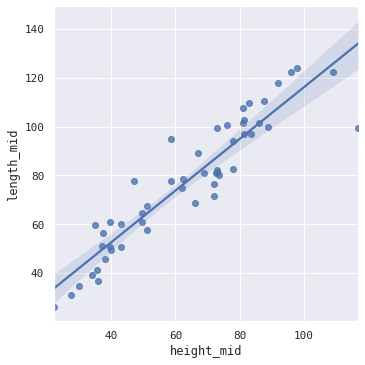

In [7]:
g = sns.lmplot(data=df, x='height_mid', y='length_mid')

### Bar plot

We lose information about absolute height and length by using the `S-index` ratio, but it makes it easier to compare sausage-ness directly.

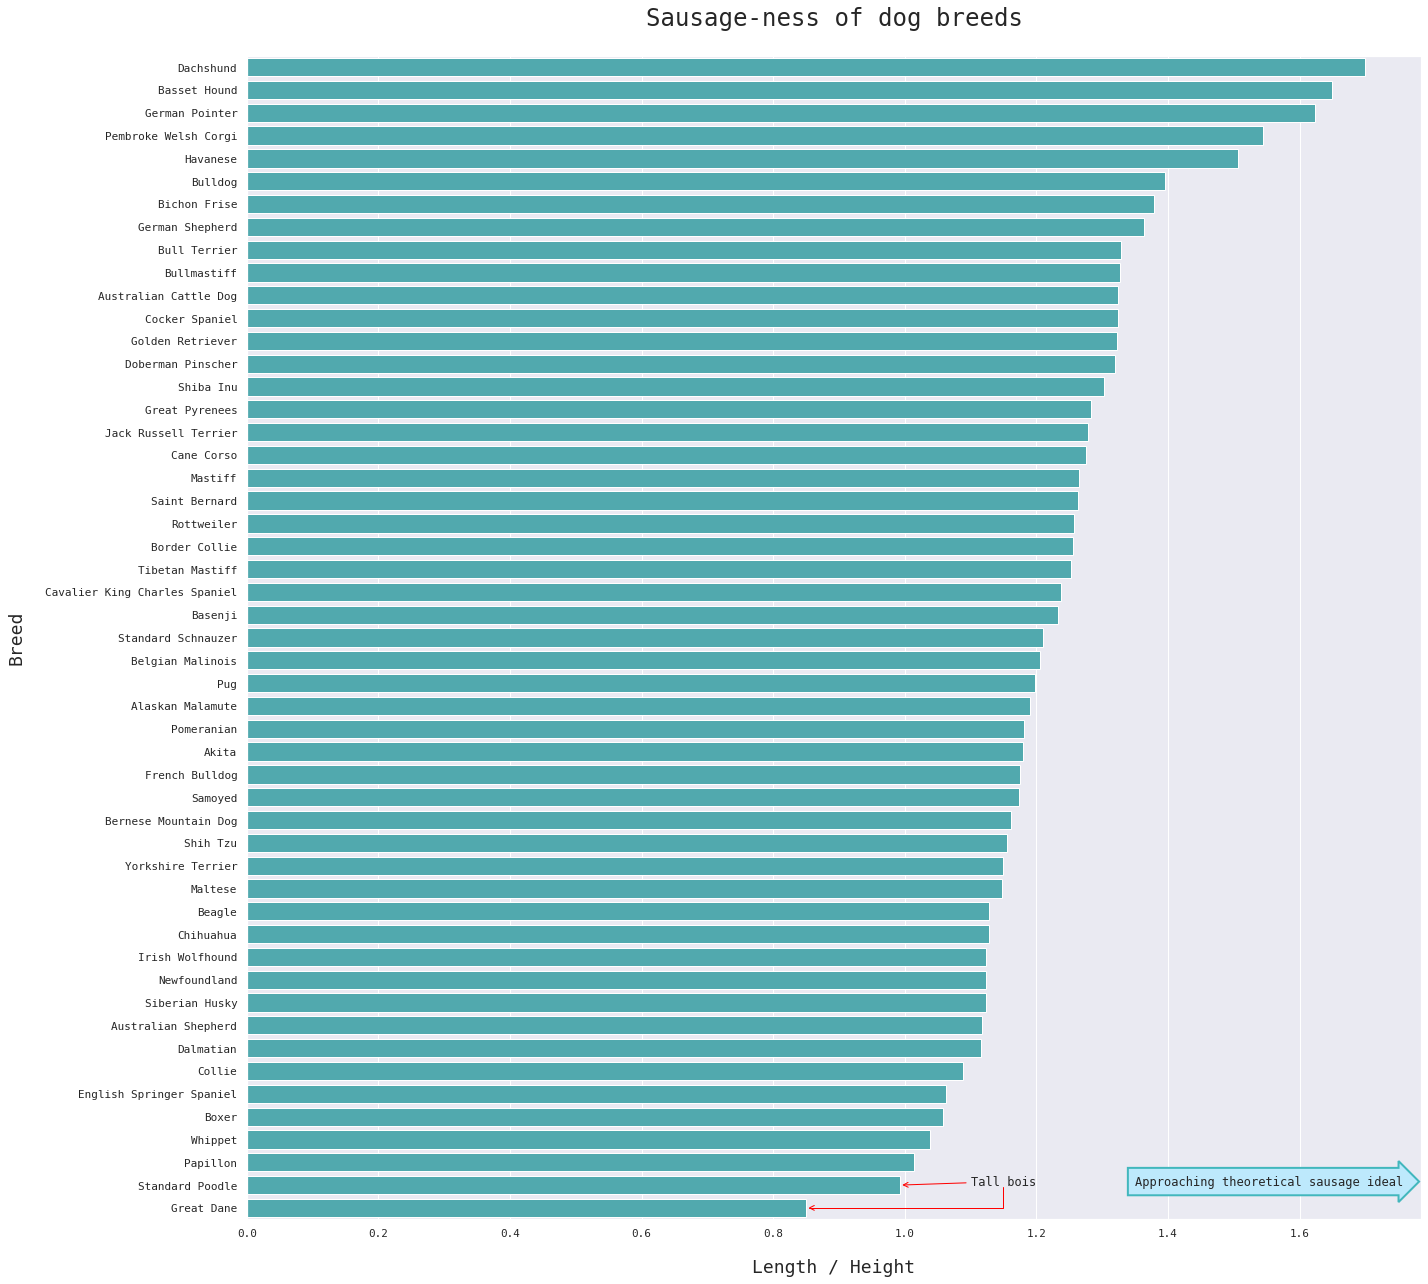

In [34]:
fig, ax = plt.subplots(figsize=(20, 18))

sns.barplot(ax=ax, data=df.sort_values('s_index', ascending=False), x='s_index', y='breed', color='#42b7bd')

# Vertical line at x=1
#ax.axvline(1, ls='--')

ax.set_title('Sausage-ness of dog breeds', fontsize=24, pad=30)
ax.set_ylabel('Breed', labelpad=20, fontsize=18)
ax.set_xlabel('Length / Height', labelpad=20, fontsize=18)


# Annotation with box
bbox_props = dict(boxstyle="rarrow,pad=0.6", fc="#bde9fc", ec="#42b7bd", lw=2)
t = ax.text(1.35, 49, 'Approaching theoretical sausage ideal', bbox=bbox_props)

# Annotation with arrows
ax.annotate('Tall bois', xy=(0.993056, 49), xycoords='data', xytext=(1.1, 49), textcoords='data',
           arrowprops=dict(arrowstyle='->', color='red'))
ax.annotate('', xy=(0.850427, 50), xycoords='data', xytext=(1.15, 49), textcoords='data',
           arrowprops=dict(arrowstyle='->', color='red', connectionstyle='angle'))

# Annotate 
#credit = 'Data: dimensions.com\nIan Tan CC-BY-SA 4.0'
#ax.text(0.01, 0.03, credit, fontsize=8, transform=fig.transFigure)

plt.tight_layout()

#filename = 'named-sausage.png'
filename = 'sausageness.png'

plt.savefig(filename, dpi=300)

Perhaps unsurprisingly, the Dachshund is the most sausage-y of sausage dogs, followed closely by the Basset Hound. I'd expected the Corgi to have a higher `S-index` than it does here. The Havanese isn't a breed I would normally classify as a sausage dog at first glance, but it goes to show how deceiving all that fur can be. 

It's also interesting to note that we have two tall bois in our sample. The Great Dane and the Standard Poodle are both taller than they are long.


<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Dog_niemiecki_%C5%BC%C3%B3%C5%82ty_LM980.jpg/1024px-Dog_niemiecki_%C5%BC%C3%B3%C5%82ty_LM980.jpg' alt='Great Dane' width='400'>

_Credit: Lilly M via Wikipedia_

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Full_attention_%288067543690%29.jpg/1920px-Full_attention_%288067543690%29.jpg' alt='Standard Poodle' width='400'>

_Credit: Tim Wilson via Wikipedia_


Now you know which sausage dogs are more sausage-y, where other dogs lie on the sausage-ness (*cough* `S-index`) spectrum, and which dogs are tall bois. You're welcome.


### Things I Learned

This project is more than a little tongue-in-cheek, but I managed to get a surprising amount out of it.

#### Mid-range

My first instinct was to use mean or median height and length as a measure of central tendency, but I stopped short as sooon as I realised that I only had access to the minimum and maximum values. I Googled around and found [this thread](https://stats.stackexchange.com/questions/162818/if-i-only-have-a-range-is-it-acceptable-to-calculate-an-average-out-of-it) about the mid-range as an estimator of the mean. It's a pretty dismal statistic, but you work with what you have.

#### Seaborn

I haven't used Matplotlib and Seaborn in a while. Though I love Seaborn for abstracting away a lot of finicky styling decisions, I now realise I need to go through the Seaborn docs properly to understand how it interfaces with Matplotlib. Specifically, I should read up on figure-level and axes level Seaborn functions (in this notebook, the scatter plot and bar plot are figure-level and axes-level functions respectively).